In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm, multivariate_normal

In [2]:
def normal_Metropolis_Hastings(B, x0, f, tau):
    """
    generate Metropolis Hastings sample from f 
    when q is normal with standard deviation tau
    """
    sample = [x0]
    for b in range(1, B):
        x_old = sample[b-1]
        y = np.random.normal(x_old, tau)
        r = np.min([1, f(y)/f(x_old)])
        u = np.random.random()
        if r > u: 
            sample.append(y)
        else:
            sample.append(x_old)
    return np.array(sample)

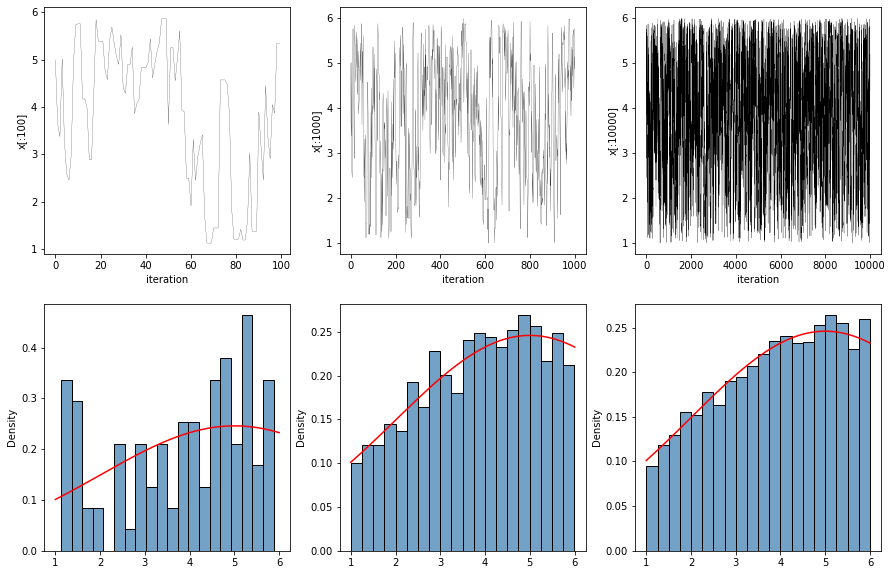

In [3]:
# Exercise 1
B = 10000

# estimating the normalization coefficient of the true distribution with Monte-Carlo simulation
uniform_sample = np.random.uniform(1, 6, B)
coeff = (5 * np.mean(norm.pdf(uniform_sample, 5, 3)))**(-1)
true_density = lambda x: coeff* norm.pdf(x, 5, 3)* (x>=1)* (x<=6)
x = np.linspace(1, 6, 10000)

x0 = 5
tau = 1
f = lambda x: norm.pdf(x, 5, 3) * (x >= 1) * (x<=6)
sample = normal_Metropolis_Hastings(B, x0, f, tau)

fig, axs = plt.subplots(2,3, figsize=[15,10])
for i in range(3):
    axs[0][i%3].plot(sample[:10**(i+2)], color='k', linewidth=0.2)
    axs[0][i%3].set(xlabel="iteration", ylabel='x[:{}]'.format(10**(i+2)))
    sns.histplot(sample[:10**(i+2)], bins=20, stat="density", color='steelblue', ax=axs[1][i%3])
    axs[1][i%3].plot(x, true_density(x), color='r')

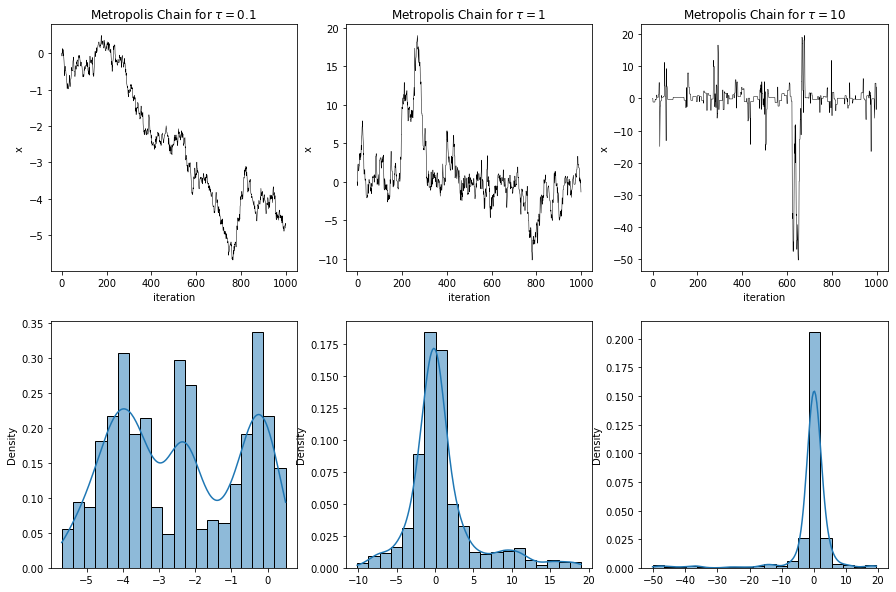

In [4]:
# Exercise 2
B = 1000
x0 = 0
tau = [0.1, 1, 10]
f = lambda x: np.pi **(-1) * 1/(1+x**2)
samples = [normal_Metropolis_Hastings(B, x0, f, t) for t in tau]

fig, axs = plt.subplots(2,3, figsize=[15,10])
for i in range(len(tau)):
    axs[0][i%3].plot(samples[i], color='k', linewidth=0.5)
    axs[0][i%3].set(xlabel="iteration", ylabel='x', title=r'Metropolis Chain for $\tau=${}'.format(tau[i]))
    sns.histplot(samples[i], kde=True, bins=20, stat="density", ax=axs[1][i%3])

In [5]:
# Exercise 3
B = 10000
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)

X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
rho = 0.7
rv = multivariate_normal([0, 0], [[1, rho], [rho, 1]])

sample = np.zeros(shape=(B, 2))
x0, y0 = -2.5, 2.5
sample[0] = x0, y0
for b in range(1, B):
    x = np.random.normal(rho*sample[b-1][1], np.square(1-rho**2))
    y = np.random.normal(rho*x, np.square(1-rho**2))
    sample[b] = x, y

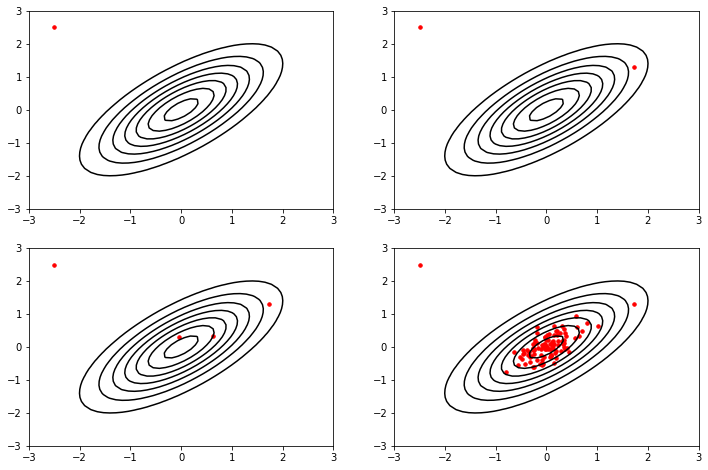

In [6]:
fig3, axs3 = plt.subplots(2,2, figsize=(12, 8))
for i in range(4):
    axs3[int(i/2)][i%2].contour(X, Y, rv.pdf(pos), colors='black')
axs3[0][0].scatter(sample[0,0], sample[0,1], color='r', s=12)
axs3[0][1].scatter(sample[:2,0], sample[:2,1], color='r', s=12)
axs3[1][0].scatter(sample[:4,0], sample[:4,1], color='r', s=12)
axs3[1][1].scatter(sample[:100,0], sample[:100,1], color='r', s=12)
plt.show()